Reading the CSV File

In [30]:
import pandas as pd

df = pd.read_csv('acc_players-2324F.csv', skiprows=[0])

df.head()


,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
0,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.200,0.615,4.1,-0.1,-6.4
1,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.500,0.500,NaN,NaN,3.5,0.0,-6.7
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
3,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0.000,1.000,NaN,1.1,0.0,-8.2
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18.0,2.9,7.9


Basic Analysis

In [70]:

total_points = df['PTS'].sum()
print ("Total points scored by all players Combined:",  total_points)
print()
player_points = df.loc[df['MP'].idxmax(), 'Player']
print("Player with the most minutes:", player_points)
print()
top_5_rebounders = df.sort_values(by='TRB', ascending=False).head(5)
print("Top 5 players in terms of rebounds:", top_5_rebounders[['Player']].to_string(index=False)) 

Total points scored by all players Combined: 38411

Player with the most minutes: Casey Morsell

Top 5 players in terms of rebounds:          Player
  Armando Bacot
Ian Schieffelin
Harrison Ingram
 Mohamed Diarra
  Norchad Omier


Player Filtering

In [69]:
over_500 = df[df['MP'] > 500]

player_assist = over_500.loc[df['AST'].idxmax(), 'Player']
print("Player with the most assist:", player_assist )
print()
top_3_assist_leads = over_500.sort_values(by= 'AST', ascending=False).head(3)
print("Top 3 Assist Leads:", top_3_assist_leads[['Player']].to_string(index=False))
print()
top_3_shot_blockers = over_500.sort_values(by= 'BLK', ascending=False).head(3)
print("Top 3 Shot Blockers:", top_3_shot_blockers[['Player']].to_string(index=False))

Player with the most assist: Reece Beekman

Top 3 Assist Leads:         Player
 Reece Beekman
Jaeden Zackery
 Elliot Cadeau

Top 3 Shot Blockers:        Player
    Ryan Dunn
 Quinten Post
Armando Bacot


School-Based Analysis

In [81]:
grouped_df_pts = df.groupby('School').agg({'PTS': 'sum'}).reset_index()
print(grouped_df_pts)
print()
grouped_df_ast = df.groupby('School').agg({'AST': 'sum'}).reset_index()
print(grouped_df_ast)
print()
top_3_schools_pts = grouped_df_pts.sort_values(by='PTS', ascending=False).head(3)
print("Top 3 scoring schools", top_3_schools_pts[['School']].to_string(index=False))

            School   PTS
0   Boston College  2667
1          Clemson  2785
2             Duke  2830
3    Florida State  2526
4     Georgia Tech  2272
5       Louisville  2304
6       Miami (FL)  2424
7         NC State  3101
8   North Carolina  3032
9       Notre Dame  2113
10      Pittsburgh  2495
11        Syracuse  2442
12        Virginia  2140
13   Virginia Tech  2547
14     Wake Forest  2733

            School  AST
0   Boston College  509
1          Clemson  533
2             Duke  551
3    Florida State  406
4     Georgia Tech  425
5       Louisville  356
6       Miami (FL)  454
7         NC State  536
8   North Carolina  536
9       Notre Dame  335
10      Pittsburgh  452
11        Syracuse  442
12        Virginia  509
13   Virginia Tech  514
14     Wake Forest  429

Top 3 scoring schools         School
      NC State
North Carolina
          Duke


Bonus


The correlation coefficient is: 0.421066389419978


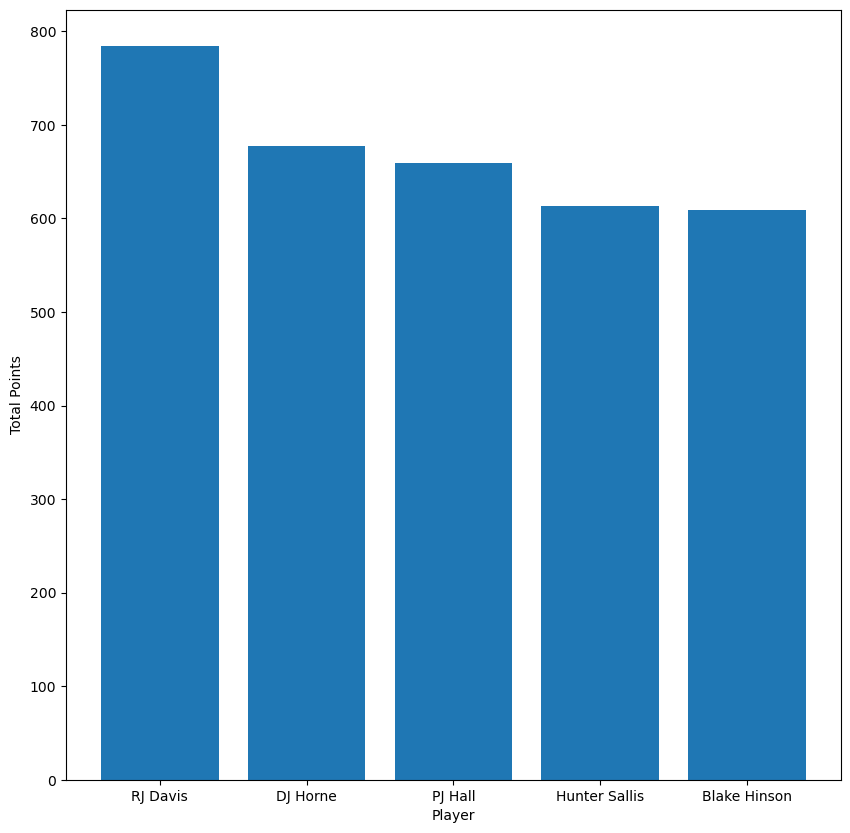

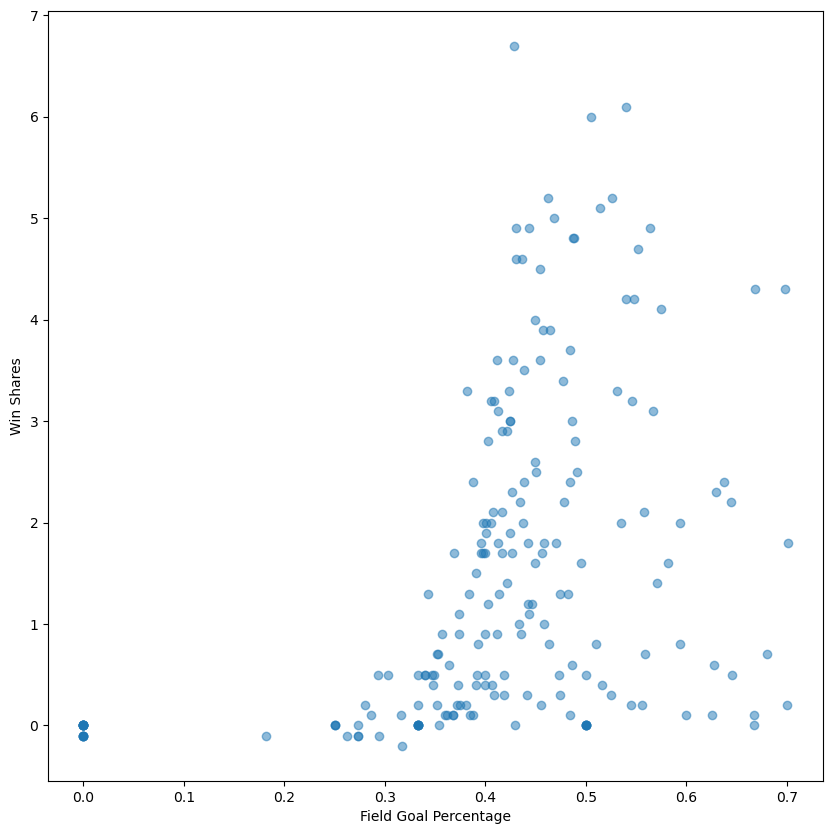

In [95]:
import matplotlib.pyplot as plt
top_5_players_pts = df.sort_values(by='PTS', ascending=False).head(5)
plt.figure(figsize=(10, 10))
plt.bar(top_5_players_pts['Player'], top_5_players_pts['PTS'])
plt.xlabel('Player')
plt.ylabel('Total Points')
print()
correlation_coefficient = df['FG%'].corr(df['WS'])
df['FG%'] = pd.to_numeric(df['FG%'], errors='coerce')
plt.figure(figsize=(10, 10))
plt.scatter(df['FG%'], df['WS'], alpha=0.5)
plt.xlabel('Field Goal Percentage')
plt.ylabel('Win Shares')
print("The correlation coefficient is:", correlation_coefficient)

In this assignment I learned how to load a CSV file into a data frame, explore how to calculate various statistical calculations, and perform operations like grouping and filtering. I also learned how to handling non-numeric and inconsistent data to ensure that the code is able to account for data sets that may not have consistently correct data. This skill will especially be helpful in the future when working with mixed data types in data analysis. 

The most challenging aspect of this assignment was figuring out how to handle incomplete or mixed data type entries, it was especially difficult when figuring out how to go about it without changing the actual CSV, so only manipulating the data frame. I overcame this problem by using the function to_numeric to attempt to convert any values to numbers. It essentially helped handle errors or missing data by replacing them with appropriate values. Another aspect of this assignment that was challenging was learning how to group data but it eventually it became clear and like the grouping done in SQL which allowed for me to understand how to go about it.

I think that the knowledge gained for filtering, manipulating, and analyzing the ACC basketball statistics could be applied to many real world data sets. One being the financial sector, the methods of filtering, manipulating  and analyzing financial data used to inform decisions in the financial industry is very applicable. It can be used to gather data like stock trends or the fluctuation of currency in a certain country, all of which are very important statistics  to consider in numerous industries. In this assignment I have enhanced my ability to get information of value from a data set that my not be uniform which is a very important skill seeing as many data sets will not be perfect in actuality.
